In [5]:
import pandas as pd
import mlflow
from pycaret.regression import *
df = pd.read_csv(r'C:\Users\sofia\Desktop\VLille-regression\data\train.csv')

mlflow.set_tracking_uri("http://localhost:5000")

C:\Users\sofia\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\sofia\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\sofia\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


In [68]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [69]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [6]:
X = df[['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'count']]

In [71]:

s = setup(X, target = 'count', train_size=0.7, preprocess=True, normalize=True)

,Description,Value
0,session_id,1888
1,Target,count
2,Original Data,"(10886, 10)"
3,Missing Values,0
4,Numeric Features,4
5,Categorical Features,4
6,Ordinal Features,0
7,High Cardinality Features,0
8,High Cardinality Method,None
9,Transformed Train Set,"(7620, 58)"


In [72]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,45.7967,4332.6432,65.7822,0.8683,0.5921,0.8365,2.0440
lightgbm,Light Gradient Boosting Machine,48.5102,4907.3862,70.0186,0.8509,0.5760,0.7314,0.2710
xgboost,Extreme Gradient Boosting,48.1649,4983.5557,70.5461,0.8484,0.6124,0.7908,0.7670
et,Extra Trees Regressor,47.3794,5388.1790,73.2986,0.8362,0.4530,0.4855,1.4150
rf,Random Forest Regressor,49.3752,5535.6843,74.3601,0.8318,0.5298,0.6775,1.2170
gbr,Gradient Boosting Regressor,66.0370,8555.2592,92.4695,0.7399,0.7944,1.3891,0.4240
dt,Decision Tree Regressor,63.5825,10279.8484,101.2664,0.6881,0.6287,0.6729,0.0660
lr,Linear Regression,79.5484,12014.9718,109.5824,0.6348,0.9871,2.4554,1.3740
ridge,Ridge Regression,79.5528,12015.8737,109.5866,0.6348,0.9874,2.4520,0.0390
br,Bayesian Ridge,79.5546,12015.9687,109.5870,0.6348,0.9876,2.4490,0.0510


In [205]:
print(best)


In [206]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

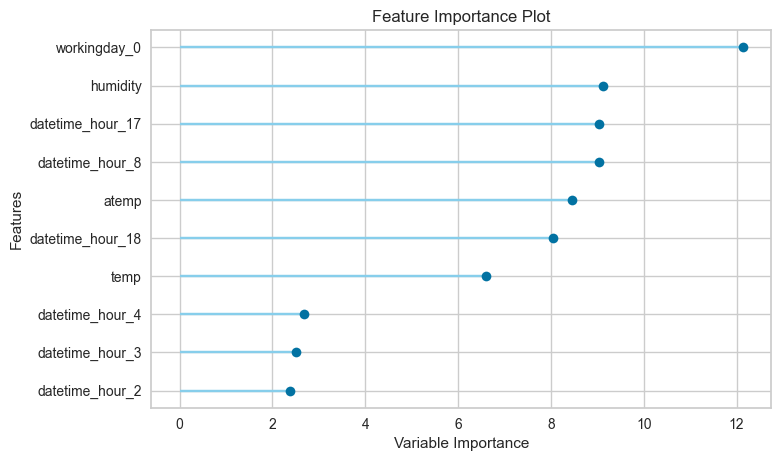

In [207]:
plot_model(best, plot = 'feature')

In [258]:
best = create_model(best)

IntProgress(value=0, description='Processing: ', max=4)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:33:06
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,CatBoost Regressor


,Split,Fold,MAE,MSE,RMSE,R2,RMSLE,MAPE


In [73]:
# s = setup(X, target = 'count', train_size=0.7, preprocess=True)
# catboost	CatBoost Regressor	45.7572	4318.0911	65.6434	0.8671	0.5933	0.8059

In [74]:
# s = setup(X, target = 'count', train_size=0.7, preprocess=True, normalize=True)
# catboost	CatBoost Regressor	45.6349	4304.4037	65.5625	0.8677	0.6030	0.8153

In [8]:
from catboost import CatBoostRegressor, Pool, metrics, cv
from sklearn.model_selection import train_test_split
from urllib.parse import urlparse

In [9]:
df_train = pd.read_csv(r'C:\Users\sofia\Desktop\VLille-regression\data\train.csv')
df_test = pd.read_csv(r'C:\Users\sofia\Desktop\VLille-regression\data\test.csv')

In [213]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()


In [10]:
X = df_train[[ 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed']]

In [19]:
y = df_train['count']

In [255]:
from sklearn.compose import make_column_transformer

In [21]:
train, test = train_test_split(df_train)

In [236]:
from sklearn.preprocessing import StandardScaler, FunctionTransformer, MaxAbsScaler,OneHotEncoder


In [248]:
# from sklearn.pipeline import make_pipeline
# to_encode = ['season','weather','temp','atemp','humidity','windspeed']
# sc_pp = make_pipeline(sc())
# cbr = CatBoostRegressor()

# ct = make_column_transformer((to_encode, sc))

# model = make_pipeline(ct, cbr)



In [228]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    r2 = r2_score(actual, pred)
    return mae, np.sqrt(mse), r2

In [253]:
from catboost.utils import eval_metric

mlflow.sklearn.autolog()

with mlflow.start_run(experiment_id = 1):
    
    model = CatBoostRegressor(iterations= 500, learning_rate=0.05, depth=10)
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)])
    
    y_pred = model.predict(X_test)
        
    mae, rmse, r2 = eval_metrics(y_test, y_pred)
    
    mlflow.log_metric("mae_test", mae)
    mlflow.log_metric("rmse_test", rmse)
    mlflow.log_metric("r2_test", r2)
    
    print("\nTest  R2 : %.2f"%model.score(X_test, y_test))
    print("Train R2 : %.2f"%model.score(X_train, y_train))
    print(f"MAE: {mae}\nRMSE: {rmse}\nR2: {r2}")
    
    
    tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme


0:	learn: 177.3595945	test: 181.1535063	best: 181.1535063 (0)	total: 9.38ms	remaining: 4.68s
1:	learn: 175.1459865	test: 178.8963354	best: 178.8963354 (1)	total: 16.6ms	remaining: 4.13s
2:	learn: 172.9618721	test: 176.6736216	best: 176.6736216 (2)	total: 23.2ms	remaining: 3.84s
3:	learn: 170.9665651	test: 174.6173985	best: 174.6173985 (3)	total: 29.9ms	remaining: 3.71s
4:	learn: 169.0190355	test: 172.7450214	best: 172.7450214 (4)	total: 36.1ms	remaining: 3.57s
5:	learn: 167.2341387	test: 171.0184622	best: 171.0184622 (5)	total: 42.3ms	remaining: 3.48s
6:	learn: 165.5694389	test: 169.3967413	best: 169.3967413 (6)	total: 48.6ms	remaining: 3.42s
7:	learn: 164.0759790	test: 167.9645177	best: 167.9645177 (7)	total: 54.7ms	remaining: 3.36s
8:	learn: 162.6694103	test: 166.6455264	best: 166.6455264 (8)	total: 60.9ms	remaining: 3.32s
9:	learn: 161.4938416	test: 165.4648203	best: 165.4648203 (9)	total: 63.8ms	remaining: 3.13s
10:	learn: 160.2179874	test: 164.2680782	best: 164.2680782 (10)	total:

In [254]:
print(model.get_best_score())

{'learn': {'RMSE': 117.63176750901478}, 'validation': {'RMSE': 144.1498238734896}}


In [ ]:
booster = CatBoostRegressor()

params = {
            'iterations':[10,50,100,500],
            'learning_rate':[0.01, 0.05,0.1],
            'depth'         : [6,8,10]
}

search_results = booster.grid_search(params, X_train, y_train, cv=5, )

print("\nBest Params : ", search_results['params'])

In [195]:
booster = CatBoostRegressor()

params = {
            'iterations':[5,50,],
            'learning_rate':[0.01, 0.1],
            'bootstrap_type':['Bayesian', 'Bernoulli', 'MVS']
}

search_results = booster.randomized_search(params, X_train, y_train, cv=5, n_iter=8)

print("\nBest Params : ", search_results['params'])

0:	learn: 262.7982646	test: 246.4265933	best: 246.4265933 (0)	total: 1.58ms	remaining: 6.34ms
1:	learn: 261.1467214	test: 244.7629240	best: 244.7629240 (1)	total: 2.85ms	remaining: 4.28ms
2:	learn: 259.5302884	test: 243.1331818	best: 243.1331818 (2)	total: 4.46ms	remaining: 2.97ms
3:	learn: 257.9125815	test: 241.5236388	best: 241.5236388 (3)	total: 5.85ms	remaining: 1.46ms
4:	learn: 256.3470550	test: 239.9634245	best: 239.9634245 (4)	total: 7.19ms	remaining: 0us

bestTest = 239.9634245
bestIteration = 4

0:	loss: 239.9634245	best: 239.9634245 (0)	total: 33.5ms	remaining: 234ms
0:	learn: 262.8386507	test: 246.4590461	best: 246.4590461 (0)	total: 2.52ms	remaining: 10.1ms
1:	learn: 261.2910114	test: 244.9224370	best: 244.9224370 (1)	total: 3.61ms	remaining: 5.42ms
2:	learn: 259.6668516	test: 243.3222377	best: 243.3222377 (2)	total: 5.22ms	remaining: 3.48ms
3:	learn: 258.0897181	test: 241.7361630	best: 241.7361630 (3)	total: 6.56ms	remaining: 1.64ms
4:	learn: 256.5682032	test: 240.1792876	

In [11]:
catboost_saved = load_model('catboost_model') 

Transformation Pipeline and Model Successfully Loaded


In [22]:
pred = predict_model(catboost_saved, test) 

In [23]:
pred

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Label
1685,2011-04-16 03:00:00,2,0,0,2,14.76,17.425,87,11.0014,5,9,14,1.739322
843,2011-02-18 14:00:00,1,0,1,1,27.06,31.060,36,19.9995,73,118,191,212.554750
8803,2012-08-09 04:00:00,3,0,1,2,27.88,31.820,89,8.9981,0,10,10,21.660639
3352,2011-08-09 14:00:00,3,0,1,1,35.26,39.395,44,19.0012,53,95,148,230.575022
5048,2011-12-04 10:00:00,4,0,0,1,13.12,16.665,81,8.9981,36,180,216,197.245983
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6999,2012-04-09 23:00:00,2,0,1,1,18.04,21.970,44,19.9995,6,61,67,118.265257
7322,2012-05-04 11:00:00,2,0,1,2,28.70,32.575,61,0.0000,77,181,258,235.388793
2628,2011-06-17 10:00:00,2,0,1,1,28.70,32.575,58,12.9980,44,126,170,214.453057
3148,2011-08-01 02:00:00,3,0,1,1,28.70,33.335,74,7.0015,4,7,11,35.473802


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def eval_metrics(actual, preds):
    mae = mean_absolute_error(actual, preds)
    mse = mean_squared_error(actual, preds)
    r2 = r2_score(actual, preds)
    return mae, np.sqrt(mse), r2

mae, rmse, r2 = eval_metrics(test["count"], pred["Label"])
print(f"MAE: {mae}\nRMSE: {rmse}\nR2: {r2}")

MAE: 51.79752241019945
RMSE: 71.32381508257723
R2: 0.8417389056979933
